In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()['date']
recent_date

'2017-08-23'

<AxesSubplot:title={'center':'Daily Percipitation in Hawaii'}, xlabel='Date', ylabel='Percipitation'>

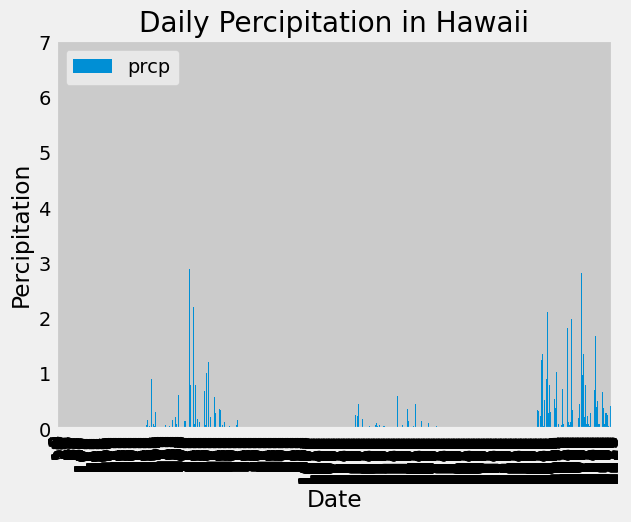

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip_scores = session.query(measurement.date, measurement.prcp).filter(func.strftime('%Y-%m-%d',measurement.date) >= one_year)                                                           


# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip_scores, columns = ['date','prcp'])

# Sort the dataframe by date
precip_df.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data
precip_plot = precip_df.plot(kind= 'bar')
plt.title("Daily Percipitation in Hawaii")
plt.xlabel("Date")
plt.ylabel("Percipitation")
precip_plot

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
station_no = session.query(station)
station_no

In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_count = session.query(measurement.station).order_by(measurement.station.desc())
station_count

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_query = [measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]

station_temp = session.query(*temp_query).filter(measurement.station == 'USC00519281').all()

station_temp_df = pd.DataFrame(station_temp, columns = ["station", "min_temp",'max_temp', 'avg_temp' ])
station_temp_df.set_index('station', inplace=True)
station_temp_df

,min_temp,max_temp,avg_temp
station,,,
USC00519281,54.0,85.0,71.663781


Text(0.5, 0, 'Temperature')

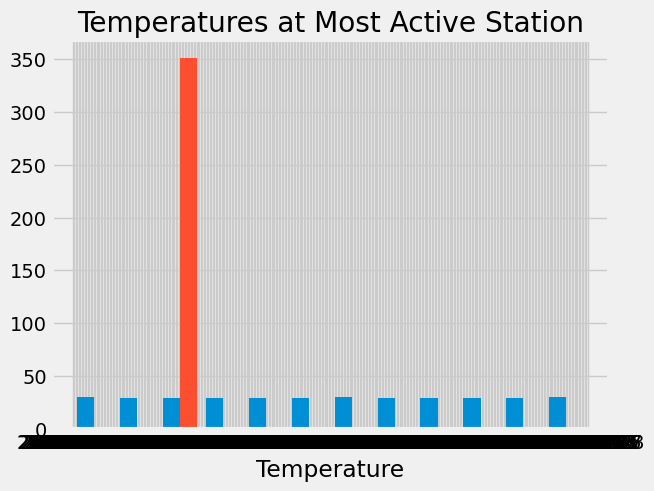

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temp_year =(session.query(measurement.date,(measurement.tobs))
                  .filter(func.strftime(measurement.date) > one_year)
                  .filter(measurement.station =='USC00519281')
                  .all())
station_temp_year_df = pd.DataFrame(station_temp_year)

plt.hist(station_temp_year_df, bins=12)
plt.title("Temperatures at Most Active Station")
plt.xlabel("Temperature")

# Close session

In [27]:
# Close Session
session.close()